In [468]:
import pandas as pd 
import numpy as np
from datasets import CRSP
import matplotlib.pyplot as plt
from itertools import combinations
from tqdm import tqdm


In [457]:
crsp = CRSP()

df = crsp.df[['permno', 'date', 'ticker', 'prc', 'ret']].copy()

df = df.query("prc > 5")

df

,permno,date,ticker,prc,ret
17,10001,1986-02-28,GFGC,6.25000,0.020408
18,10001,1986-03-31,GFGC,6.31250,0.025200
19,10001,1986-04-30,GFGC,6.37500,0.009901
20,10001,1986-05-30,GFGC,6.31250,-0.009804
21,10001,1986-06-30,GFGC,6.12500,-0.013069
...,...,...,...,...,...
3785681,93436,2023-08-31,TSLA,258.07999,-0.034962
3785682,93436,2023-09-29,TSLA,250.22000,-0.030456
3785683,93436,2023-10-31,TSLA,200.84000,-0.197346
3785684,93436,2023-11-30,TSLA,240.08000,0.195379


In [458]:
# Formation Period: 12 months
# Rebalancing: Every 6 months

In [459]:
# Add extra date variables
df['mdt'] = df['date'].dt.strftime("%Y-%m")
df['year'] = df['date'].dt.strftime("%Y")
df['month'] = df['date'].dt.strftime("%m")

In [460]:
df['logret'] = np.log1p(df['ret'])
df['cumret'] = df.groupby(['permno','year'])['logret'].cumsum().reset_index(drop=True)
df

,permno,date,ticker,prc,ret,mdt,year,month,logret,cumret
17,10001,1986-02-28,GFGC,6.25000,0.020408,1986-02,1986,02,0.020203,-0.120099
18,10001,1986-03-31,GFGC,6.31250,0.025200,1986-03,1986,03,0.024888,-0.040057
19,10001,1986-04-30,GFGC,6.37500,0.009901,1986-04,1986,04,0.009852,-0.062618
20,10001,1986-05-30,GFGC,6.31250,-0.009804,1986-05,1986,05,-0.009852,-0.042815
21,10001,1986-06-30,GFGC,6.12500,-0.013069,1986-06,1986,06,-0.013155,-0.072668
...,...,...,...,...,...,...,...,...,...,...
3785681,93436,2023-08-31,TSLA,258.07999,-0.034962,2023-08,2023,08,-0.035588,NaN
3785682,93436,2023-09-29,TSLA,250.22000,-0.030456,2023-09,2023,09,-0.030929,NaN
3785683,93436,2023-10-31,TSLA,200.84000,-0.197346,2023-10,2023,10,-0.219832,NaN
3785684,93436,2023-11-30,TSLA,240.08000,0.195379,2023-11,2023,11,0.178463,NaN


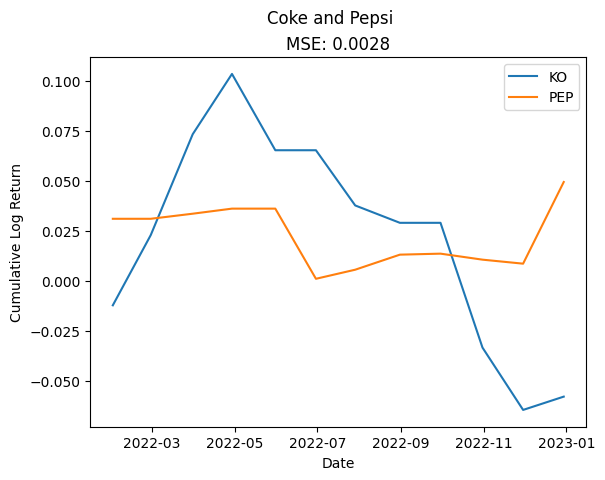

In [461]:
# Example of Pepsi and Coke cointegration
filtered = df[(df['year'] == '2022') & (df['permno'].isin([13856, 11308]))]
pivot = filtered.pivot(index='date', values='cumret', columns='ticker')
mse = np.mean((pivot['PEP'] - pivot['KO'])**2)

for ticker, group in filtered.groupby('ticker'):
    plt.plot(group['date'], group['cumret'], label=ticker)

plt.xlabel('Date')
plt.ylabel('Cumulative Log Return')
plt.suptitle('Coke and Pepsi')
plt.title(f"MSE: {round(mse,4)}")
plt.legend()
plt.show()

In [462]:
pivot = df.groupby(['permno','date'])['cumret'].mean().reset_index().pivot(index='date', columns='permno', values='cumret')
pivot['year'] = pivot.index.year
pivot

permno,10001,10002,10003,10006,10007,10008,10009,10010,10011,10012,...,93423,93426,93428,93429,93432,93433,93434,93435,93436,year
date,,,,,,,,,,,,,,,,,,,,,
1926-01-30,NaN,NaN,NaN,-0.197577,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926
1926-02-27,NaN,NaN,NaN,0.114541,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926
1926-03-31,NaN,NaN,NaN,0.236644,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926
1926-04-30,NaN,NaN,NaN,0.292524,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926
1926-05-28,NaN,NaN,NaN,0.342005,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2023-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023
2023-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023


In [463]:
def compute_mse(a:float, b:float)->float:
    return np.mean((a - b) ** 2)

In [470]:
years = pivot['year'].unique()  # [2017, 2018]

mse_frame = pd.DataFrame(index=years, columns=pivot.columns, data=float("inf"))
pairs_frame = pd.DataFrame(index=years, columns=pivot.columns, data=None)

# Loop through years with tqdm
for year in tqdm(years, desc='Processing years'):
    slice = pivot[pivot['year'] == year].dropna(axis=1, how='all').drop(columns=['year'])
    
    returns = slice.dropna(axis=1).T.dropna().T
    returns_array = returns.values
    
    # Loop through combinations with tqdm
    for i, j in combinations(range(returns_array.shape[1]), 2):
        stock_i = returns.columns[i]
        stock_j = returns.columns[j]
        
        stock_i_returns = returns_array[:, i]
        stock_j_returns = returns_array[:, j]

        mse = np.mean((stock_i_returns - stock_j_returns) ** 2)

        if mse < mse_frame.at[year, stock_i]:
            mse_frame.at[year, stock_i] = mse
            pairs_frame.at[year, stock_i] = returns.columns[j]


Processing years: 100%|██████████| 98/98 [13:58<00:00,  8.56s/it]


In [471]:
pairs_frame.to_csv("pairs_frame.csv")
mse_frame.to_csv("mse_frame.csv")

In [472]:
# Create result dataframes
result_pairs_frame = pairs_frame.unstack().reset_index().rename(columns={'level_1': 'year', 0: 'pair'})
result_mse_frame = mse_frame.unstack().reset_index().rename(columns={'level_1':'year', 0: 'mse'})

# Merge
result_mse_frame = result_mse_frame.merge(result_pairs_frame, on=['permno','year'], how='left')

# Reformat
result_mse_frame = result_mse_frame.sort_values(by=['year','mse'], ascending=True).dropna().reset_index(drop=True)

result_mse_frame

,permno,year,mse,pair
0,11789,1926,0.001009,25486
1,10225,1926,0.001102,25486
2,13215,1926,0.001107,13741
3,10196,1926,0.001224,10225
4,12079,1926,0.001330,25486
...,...,...,...,...
155496,52708,2023,0.471855,63132
155497,63132,2023,0.529239,77447
155498,75573,2023,0.553209,76082
155499,13816,2023,0.562844,16696


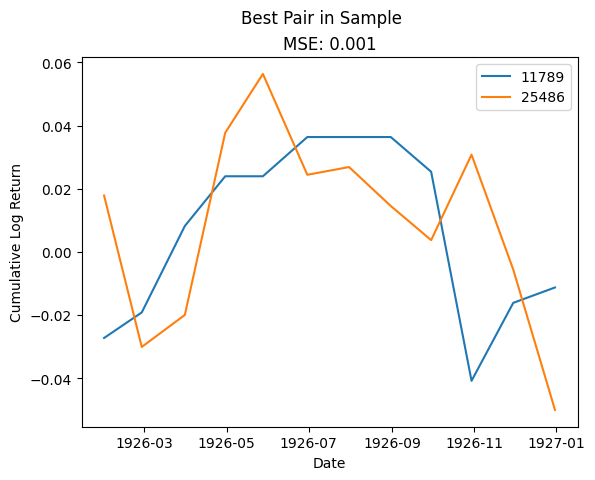

In [475]:
pair_1, year, mse, pair_2 = result_mse_frame.iloc[0]
filtered = df[(df['year'].astype(int) == year) & (df['permno'].isin([pair_1,pair_2]))]

for ticker, group in filtered.groupby('permno'):
    plt.plot(group['date'], group['cumret'], label=ticker)

plt.xlabel('Date')
plt.ylabel('Cumulative Log Return')
plt.suptitle('Best Pair in Sample')
plt.title(f"MSE: {round(mse,4)}")
plt.legend()
plt.show()